## 1. Leitura do Dataset

Carregaremos os dados e exploraremos suas primeiras linhas para verificar sua estrutura.

In [4]:
import pandas as pd

# Carregar o dataset a partir do diretório local
file_path = "../data/heart.csv"
data = pd.read_csv(file_path)

# Exibir as primeiras linhas
print(data.head())

# Exibir informações básicas sobre os dados
print(data.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

## 2. Análise Descritiva

Exploraremos as estatísticas descritivas das variáveis contínuas, como idade, colesterol, pressão arterial em repouso e frequência cardíaca máxima.

In [5]:
# Estatísticas descritivas
print(data.describe())

# Estatísticas específicas de algumas colunas de interesse
print(data[['age', 'chol', 'trestbps', 'thalach']].describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

## 3. Visualização dos Dados

Agora vamos visualizar a distribuição das variáveis como idade, colesterol, pressão arterial e frequência cardíaca máxima, usando histogramas, boxplots e gráficos de dispersão.

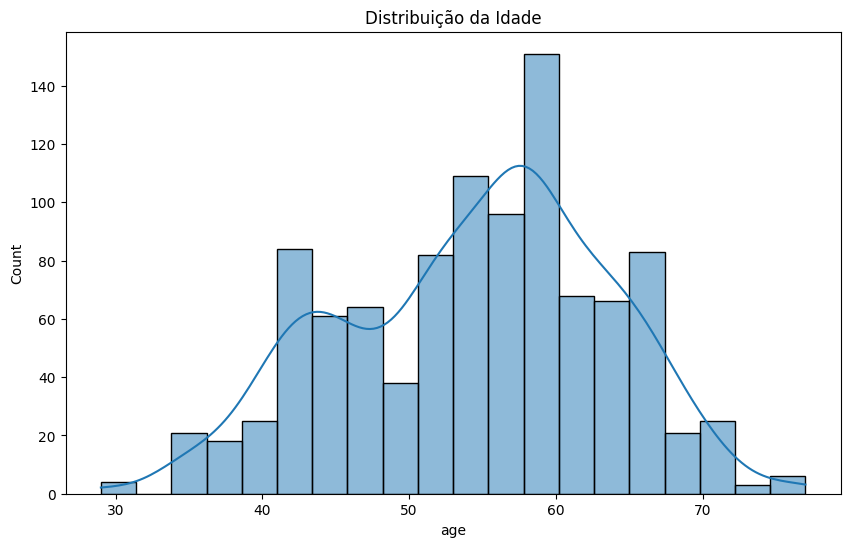

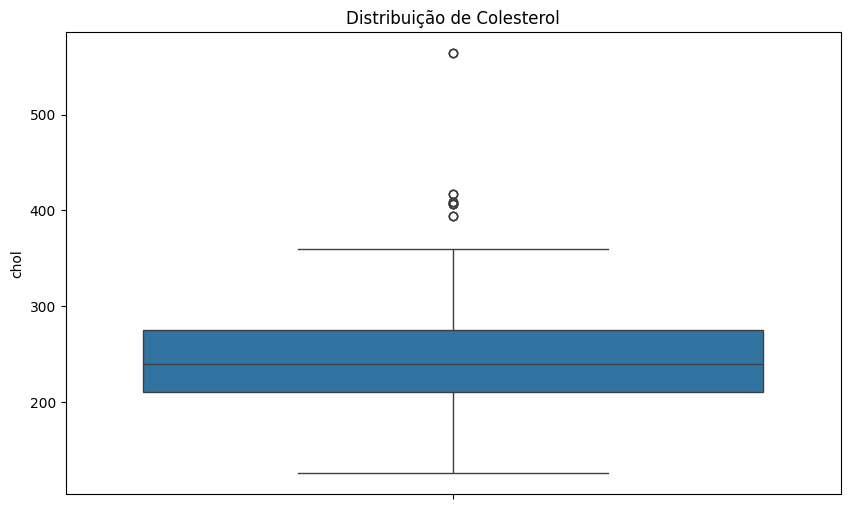

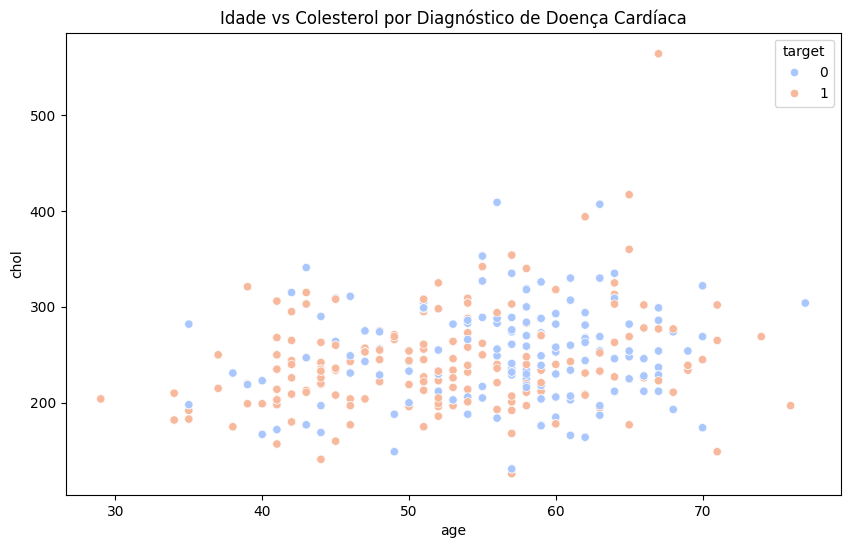

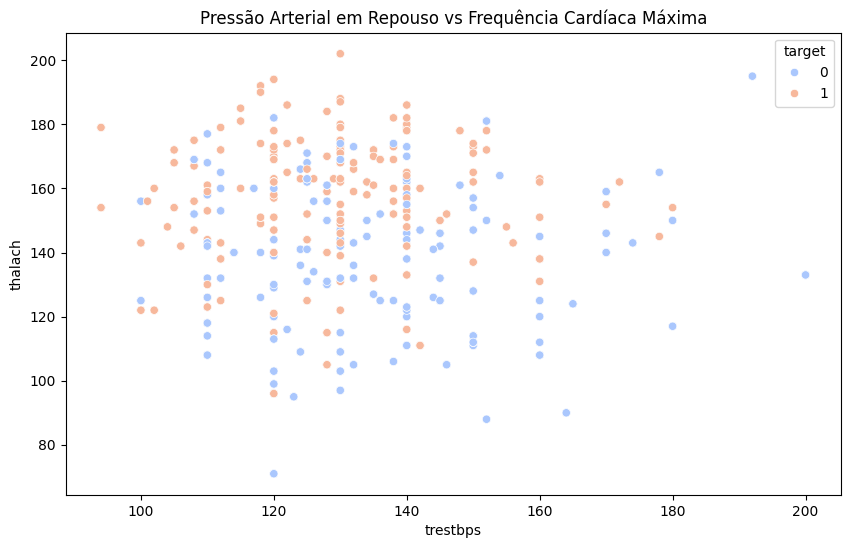

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para idade
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribuição da Idade')
plt.show()

# Boxplot para colesterol
plt.figure(figsize=(10, 6))
sns.boxplot(y='chol', data=data)
plt.title('Distribuição de Colesterol')
plt.show()

# Gráfico de dispersão: idade vs. colesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=data, palette='coolwarm')
plt.title('Idade vs Colesterol por Diagnóstico de Doença Cardíaca')
plt.show()

# Gráfico de dispersão: pressão arterial vs frequência cardíaca
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trestbps', y='thalach', hue='target', data=data, palette='coolwarm')
plt.title('Pressão Arterial em Repouso vs Frequência Cardíaca Máxima')
plt.show()

## 4. Teste de Correlação

Vamos calcular a correlação entre as variáveis contínuas para identificar possíveis relações entre elas.

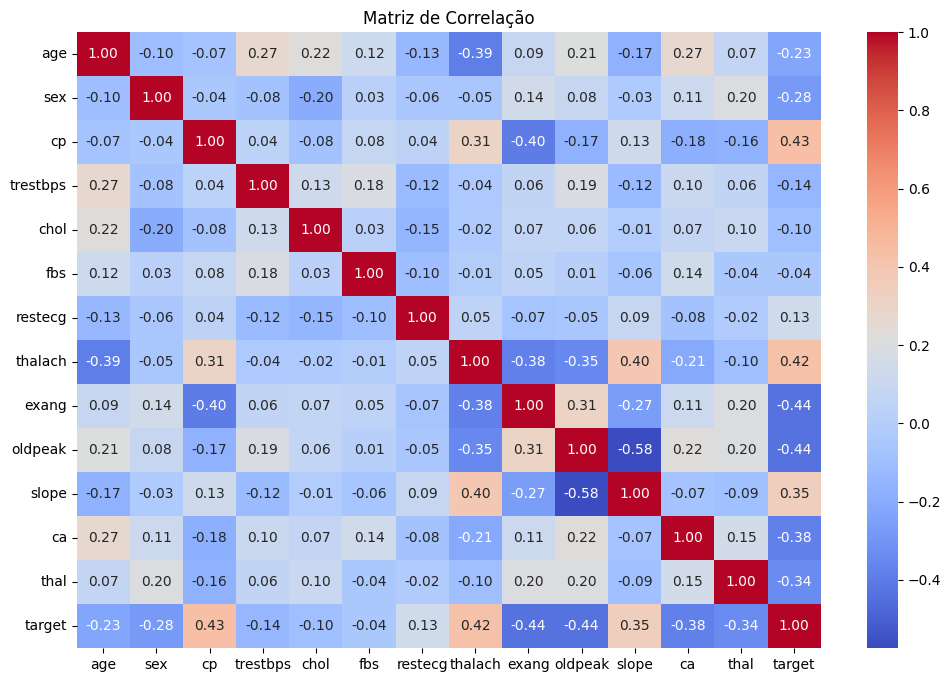

In [7]:
# Matriz de correlação
correlation_matrix = data.corr()

# Mapa de calor da correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## 5. Modelo Explicativo: Regressão Logística

Agora vamos construir um modelo de regressão logística para prever a presença de doença cardíaca com base em fatores como idade, sexo, tipo de dor no peito, colesterol, frequência cardíaca máxima, e número de vasos principais.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Selecionar as variáveis independentes (X) e a variável dependente (y)
X = data[['age', 'sex', 'cp', 'chol', 'thalach', 'ca']]
y = data['target']

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Treinar o modelo
model.fit(X_train, y_train)

# Prever os valores no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

Acurácia: 0.76
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       102
           1       0.74      0.80      0.77       103

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



## 6. Interpretação dos Resultados

Podemos interpretar os coeficientes do modelo de regressão logística para entender como cada variável influencia a probabilidade de ter doença cardíaca.

In [13]:
import statsmodels.api as sm

# Selecionar as variáveis independentes (X) e a variável dependente (y)
X = data[['age', 'sex', 'cp', 'chol', 'thalach', 'ca']]
y = data['target']

# Adicionar uma constante à matriz X para incluir o intercepto no modelo
X = sm.add_constant(X)

# Instanciar o modelo de regressão logística
logit_model = sm.Logit(y, X)

# Ajustar o modelo
result = logit_model.fit()

# Exibir o sumário com coeficientes, valores p e intervalos de confiança
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.432907
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1018
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                  0.3751
Time:                        23:18:03   Log-Likelihood:                -443.73
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                7.267e-112
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4628      1.031     -1.418      0.156      -3.484       0.559
age           -0.0225      0.

## Explicação

- sm.Logit(y, X): Isso define o modelo de regressão logística, onde y é a variável dependente (presença de doença cardíaca) e X são as variáveis explicativas (idade, sexo, etc.).
- sm.add_constant(X): Adiciona uma constante para que o modelo inclua um intercepto (bias).
- result.summary(): Exibe um sumário detalhado que inclui os coeficientes do modelo, seus valores p (para testar a significância estatística), intervalos de confiança e outras estatísticas.

## Interpretação dos Resultados:
- coef: Coeficiente da variável no modelo. Valores positivos indicam que um aumento na variável aumenta a probabilidade de doença cardíaca, enquanto valores negativos indicam o oposto.
- P>|z|: Valor p, que testa a significância da variável. Se o valor p for menor que 0,05, consideramos a variável estatisticamente significativa.
- [0.025, 0.975]: Intervalos de confiança para o coeficiente. Se o intervalo não incluir o zero, a variável é considerada estatisticamente significativa.
